## 小任務
- 請協助我建立一迴歸模型預測房屋租金?


In [1]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/taipeifubon/master/data/rent_591_sample.csv', index_col=0)

In [2]:
df.head()

,id,address,floor,allfloor,layout,area,price,browsenum_all
0,6032971,永康街47巷永康街五樓頂加..,5,5,5房3廳3衛,46.8,"60,000",751
1,6054083,仁愛路四段仁愛路樹海景觀..,7,12,4房2廳2衛,76.9,"100,000",162
2,5957980,光復南路高樓層大巨蛋正對..,10,13,4房2廳2衛,71.3,"150,000",2385
3,6043839,永康街23巷永康商圈..,3,4,2房1廳1衛,18.0,"29,000",1323
4,5181793,雲和街師大*已收訂..,5,5,2房2廳1衛,28.0,"31,800",2303


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 29
Data columns (total 8 columns):
id               720 non-null int64
address          720 non-null object
floor            720 non-null int64
allfloor         720 non-null int64
layout           720 non-null object
area             720 non-null float64
price            720 non-null object
browsenum_all    720 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 50.6+ KB


In [5]:
df.isna().sum()

id               0
address          0
floor            0
allfloor         0
layout           0
area             0
price            0
browsenum_all    0
dtype: int64

In [6]:
df['price'] = df['price'].map(lambda e: int(e.replace(',', '')))

In [7]:
df[['bedroom', 'livingroom', 'bathroom']] =df['layout'].str.extract('(\d+)房(\d+)廳(\d+)衛')

In [8]:
df = df[['floor', 'allfloor', 'area', 'bedroom', 'livingroom', 'bathroom', 'price']]

In [9]:
df.head()

,floor,allfloor,area,bedroom,livingroom,bathroom,price
0,5,5,46.8,5,3,3,60000
1,7,12,76.9,4,2,2,100000
2,10,13,71.3,4,2,2,150000
3,3,4,18.0,2,1,1,29000
4,5,5,28.0,2,2,1,31800


In [19]:
#X = df[['floor', 'allfloor', 'area', 'bedroom', 'livingroom', 'bathroom']]
df.dropna(inplace=True)
X = df.iloc[:,:-1]
y = df.iloc[:,-1].values
#X
#y

In [20]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
y_hat = clf.predict(X)

In [24]:
from sklearn.metrics import r2_score
?r2_score

In [26]:
r2_score(y, y_hat)

0.690476404252544

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor()
clf.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [28]:
y_hat = clf.predict(X)

In [29]:
r2_score(y, y_hat)

0.896455921050598

In [33]:
X['livingroom'] = X['livingroom'].astype(int)
X['bedroom'] = X['bedroom'].astype(int)
X['bathroom'] = X['bathroom'].astype(int)

In [34]:
import statsmodels.api as sm

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     262.1
Date:                Tue, 21 Apr 2020   Prob (F-statistic):          8.83e-176
Time:                        13:56:57   Log-Likelihood:                -8097.7
No. Observations:                 712   AIC:                         1.621e+04
Df Residuals:                     705   BIC:                         1.624e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5846.5997   3721.958      1.571      0.1

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 決策樹

In [35]:
from sklearn.datasets import load_iris
iris = load_iris()

In [36]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [38]:
iris.data.shape

(150, 4)

In [39]:
iris.data[0:3,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [40]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [41]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
clf.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [43]:
predicted = clf.predict(iris.data)

In [45]:
(predicted == iris.target).sum()

150

In [47]:
from sklearn import tree
tree.export_graphviz(clf, out_file= 'tree.dot')

In [48]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [49]:
from sklearn import tree
tree.export_graphviz(clf, out_file= 'tree.dot')

## 決策邊界

In [65]:
iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target


In [66]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

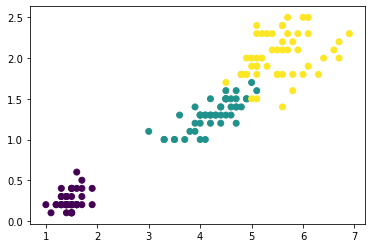

In [67]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0], X[:, 1], c = y)

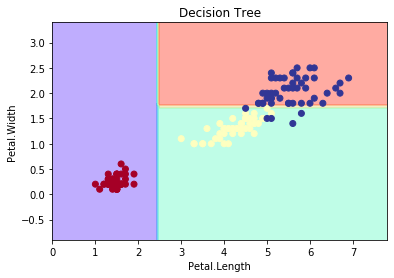

In [68]:
import numpy as np
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

plt.plot()
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.rainbow)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, cmap = plt.cm.RdYlBu)
plt.title('Decision Tree')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()
